In [1]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile

extract_path = "/content/unzipped_data"

with zipfile.ZipFile("/content/drive/MyDrive/archive.zip", 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped Successfully!")


Unzipped Successfully!


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

#Set the path to the dataset
dataset_dir="/content/unzipped_data/Fruit And Vegetable Diseases Dataset"
classes=os.listdir(dataset_dir)

#Create directories for train, val, and test sets

output_dir='output_dataset'

os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
  os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
  os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
  os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)
  class_dir=os.path.join(dataset_dir, cls)
  images=os.listdir(class_dir)[:200]
  print(cls,len(images))

  train_and_val_images, test_images=train_test_split(images, test_size=0.2, random_state=42)
  train_images, val_images=train_test_split(train_and_val_images, test_size=0.25, random_state=42)

  #Copy Images to respective directories
  for img in train_images:
    shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
  for img in val_images:
    shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
  for img in test_images:
    shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")

Strawberry__Rotten 200
Guava__Rotten 200
Grape__Rotten 200
Mango__Rotten 200
Tomato__Rotten 200
Mango__Healthy 200
Strawberry__Healthy 200
Bellpepper__Healthy 200
Potato__Healthy 200
Grape__Healthy 200
Jujube__Healthy 200
Pomegranate__Rotten 200
Cucumber__Rotten 200
Pomegranate__Healthy 200
Banana__Rotten 200
Orange__Rotten 200
Banana__Healthy 200
Cucumber__Healthy 200
Bellpepper__Rotten 200
Potato__Rotten 200
Carrot__Rotten 200
Tomato__Healthy 200
Orange__Healthy 200
Jujube__Rotten 200
Apple__Healthy 200
Apple__Rotten 200
Carrot__Healthy 200
Guava__Healthy 200
Dataset split into training, validation, and test sets.


In [5]:
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224) # Common size for many models like ResNet, VGG, MobileNet

#Create ImageDataGenerators for resizing and augmenting the images
train_datagen=ImageDataGenerator(
  rescale=1./255,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

val_test_datagen=ImageDataGenerator (rescale=1./255)

#Load and resize the images from directories
train_generator=train_datagen.flow_from_directory(
  train_dir,
  target_size=IMG_SIZE,
  batch_size=32,
  class_mode='categorical'
)

val_generator=val_test_datagen.flow_from_directory(
  val_dir,
  target_size=IMG_SIZE,
  batch_size=32,
  class_mode='categorical'
)
test_generator=val_test_datagen.flow_from_directory(
  test_dir,
  target_size=IMG_SIZE,
  batch_size=32,
  class_mode='categorical',
  shuffle=False
)

#print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 3358 images belonging to 28 classes.
Found 1118 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

## Data Visualization


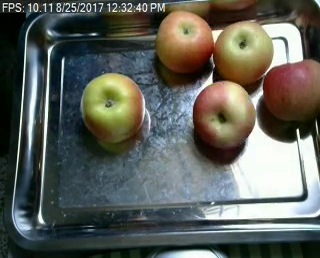

In [6]:
import random
from IPython.display import Image, display

#Specify the path to your image folder
folder_path='/content/output_dataset/train/Apple__Healthy'

#List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

#Select a random image from the list
selected_image = random.choice(image_files)

#Display the randomly selected image
image_path=os.path.join(folder_path, selected_image)

display(Image(filename=image_path))

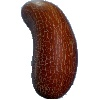

In [7]:
import random
from IPython.display import Image, display

#Specify the path to your image folder
folder_path='/content/output_dataset/train/Cucumber__Rotten'

#List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

#Select a random image from the list
selected_image = random.choice(image_files)

#Display the randomly selected image
image_path=os.path.join(folder_path, selected_image)

display(Image(filename=image_path))

In [8]:
trainpath = "/content/output_dataset/train"
testpath="/content/output_dataset/test"

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2, shear_range= 0.2)
test_datagen = ImageDataGenerator (rescale = 1./255)

train = train_datagen.flow_from_directory(trainpath, target_size =(224,224), batch_size = 20)
test = test_datagen.flow_from_directory(testpath, target_size = (224,224), batch_size = 20)

Found 3358 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


## Model Building

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [10]:
vgg = VGG16(include_top=False, input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [12]:
len(vgg.layers)

19

In [13]:
for layer in vgg.layers:
    layer.trainable = False

In [14]:
x = Flatten()(vgg.output)

In [15]:
output = Dense(28, activation='softmax')(x)

In [16]:
vgg16 = Model(inputs=vgg.input, outputs=output)

In [17]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
from IPython.core import history
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
vgg16.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = vgg16.fit(train_generator, validation_data=val_generator, epochs=15, steps_per_epoch=len(train_generator), callbacks=[early_stopping])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 95/105 ━━━━━━━━━━━━━━━━━━━━ 8s 858ms/step - accuracy: 0.1611 - loss: 3.0509

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


105/105 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.1737 - loss: 3.0103 - val_accuracy: 0.4839 - val_loss: 1.9308
Epoch 2/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 92s 876ms/step - accuracy: 0.4824 - loss: 1.9520 - val_accuracy: 0.5742 - val_loss: 1.5147
Epoch 3/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 102s 974ms/step - accuracy: 0.5960 - loss: 1.5608 - val_accuracy: 0.6324 - val_loss: 1.2879
Epoch 4/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 98s 930ms/step - accuracy: 0.6463 - loss: 1.3503 - val_accuracy: 0.6798 - val_loss: 1.1449
Epoch 5/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 93s 888ms/step - accuracy: 0.6999 - loss: 1.1525 - val_accuracy: 0.6977 - val_loss: 1.0456
Epoch 6/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 141s 874ms/step - accuracy: 0.7152 - loss: 1.0797 - val_accuracy: 0.7281 - val_loss: 0.9707
Epoch 7/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 92s 879ms/step - accuracy: 0.7374 - loss: 1.0061 - val_accuracy: 0.7352 - val_loss: 0.9058
Epoch 8/15
105/105 ━━━━━━━━━━━━━━━━━━━━ 143s 882ms/step - accuracy: 0.7450 - loss: 0.9654 - va

## Accuracy

In [28]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

Final Training Accuracy: 0.8314473032951355
Final Validation Accuracy: 0.8139534592628479


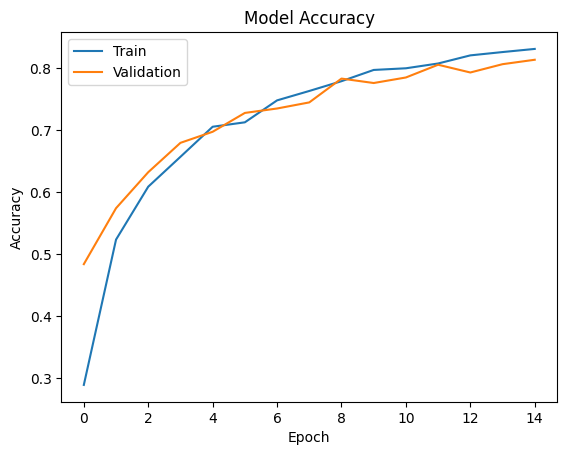

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [19]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

## Testing class1

In [20]:
img_path = "/content/output_dataset/train/Bellpepper__Healthy/freshPepper (182).jpg"


In [21]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
labels[np.argmax(preds)]

4

## Testing class 2

In [23]:
img_path="/content/output_dataset/train/Potato__Rotten/rottenPotato (280).jpg"

In [24]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
pred = vgg16.predict(np.array([x]))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.6567580e-16,
        0.0000000e+00, 3.7113844e-38, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.4702005e-29, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.2330294e-39, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [25]:
labels[np.argmax(pred)]

23

## Saving the Model

In [26]:
vgg16.save('healthy_vs_rotten.h5')

In [27]:
import json
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)
